<a href="https://colab.research.google.com/github/jinxtupid/ECE421-2022W/blob/main/ECE421_Programming_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

def loadData():
    with np.load('/content/gdrive/My Drive/4-2/ECE421/notMNIST.npz') as dataset:
        Data, Target = dataset['images'], dataset['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget


Mounted at /content/gdrive


**1. Loss Function and Gradient**

In [ ]:
def loss(w, b, x, y, reg):

    # logit
    z = np.matmul(x, w) + b
    
    # Probability Prediction
    y_hat = 1/(1 + np.exp(-z))

    # Cross Entropy Loss 
    L_CE = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    # Regularization Term
    L_W = 0.5 * reg * (np.linalg.norm(w) ** 2)

    return L_W + L_CE

def grad_loss(w, b, x, y, reg):
    n = np.shape(y)[0]

    # logit
    z = np.matmul(x, w) + b
    
    # Probability Prediction
    y_hat = 1/(1 + np.exp(-z))
    
    # gradient of the loss w.r.t. w
    grad_w = (np.matmul(x.T, y_hat - y))/n + reg * w

    # gradient of the loss w.r.t. bias
    grad_b = np.sum(y_hat - y)/n
  
    return grad_w, grad_b


**2.Gradient Descent Implementation** 

In [ ]:
def accuracy(w,b,x,y):
    z = np.matmul(x, w) + b
    
    y_hat = 1/(1 + np.exp(-z))
    return np.sum((y_hat >= 0.5) == y)/np.shape(y)[0]

    
def grad_descent(w, b, trainingData, trainingLabels, validationData, validationLabels, testingData, testingLabels, alpha, epochs, reg, error_tol):
    training_loss, validation_loss, testing_loss, training_acc, validation_acc, testing_acc  = [], [], [], [], [], []
    
    for i in range(epochs):
        # Calculate gradient
        grad_w, grad_b = grad_loss(w, b, trainingData, trainingLabels, reg)
        w_new = w - alpha * grad_w
        b_new = b - alpha * grad_b
        
        # Find losses
        training_loss.append(loss(w_new,b_new,trainingData,trainingLabels,reg))
        validation_loss.append(loss(w_new,b_new,validationData,validationLabels,reg))
        testing_loss.append(loss(w_new,b_new,testingData,testingLabels,reg))
        
        # Find accuracies
        training_acc.append(accuracy(w,b,trainingData, trainingLabels))
        validation_acc.append(accuracy(w,b,validationData, validationLabels))
        testing_acc.append(accuracy(w,b,testingData, testingLabels))

        # Check if error is small enough
        if  np.linalg.norm(w_new - w) < error_tol:
            break
        
        # Update w and b
        w = w_new
        b = b_new
    
    return w_new, b_new, training_loss, validation_loss, testing_loss, training_acc, validation_acc, testing_acc

**3. Tuning the Learning Rate (alpha = 0.005, 0.001, 0.0001)**

In [ ]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

# get image size
img_size = np.shape(trainData)[1]* np.shape(trainData)[2]

# flatten images 
trainData = trainData.reshape(np.shape(trainData)[0], img_size)
validData = validData.reshape(np.shape(validData)[0], img_size) 
testData  = testData.reshape(np.shape(testData)[0], img_size)

# initialize
epochs = 5000
error_tol = 1e-7
w = np.random.normal(0, 0.5, (np.shape(trainData)[1],1))
b = 0


alphas = [0.005, 0.001, 0.0001]
lambdas = [0.001, 0.1, 0.5]


In [ ]:
for alpha in alphas:
    new_w, new_b, train_loss, valid_loss, test_loss, train_acc, valid_acc, test_acc = grad_descent(w, b, trainData, trainTarget, validData, validTarget, testData, testTarget, alpha, epochs, 0, error_tol)
    plt.figure()
    plt.plot(range(epochs), train_loss, 'r-')
    plt.plot(range(epochs), valid_loss, 'b-')
    plt.legend(["Training Loss", "Validation Loss"])
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss with alpha = " + str(alpha))


    plt.figure()
    plt.plot(range(epochs), train_acc, 'r-')
    plt.plot(range(epochs), valid_acc, 'b-')
    plt.legend(["Training Accuracy", "Validation Accuracy"])
    plt.xlabel('Epochs')
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy with alpha = " + str(alpha))
    # print(valid_acc[-1])
    # print(train_acc[-1])

**4. Generalization**


*   Investigate the impact of regularization by modifying the regularization parameter.



In [ ]:
for lam in lambdas:
    new_w, new_b, train_loss, valid_loss, test_loss, train_acc, valid_acc, test_acc = grad_descent(w, b, trainData, trainTarget, validData, validTarget, testData, testTarget, 0.005, epochs, lam, error_tol)
    plt.figure()
    plt.plot(range(epochs), train_loss, 'r-')
    plt.plot(range(epochs), valid_loss, 'b-')
    plt.legend(["Training Loss", "Validation Loss"])
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss with lambda = " + str(lam))


    plt.figure()
    plt.plot(range(epochs), train_acc, 'r-')
    plt.plot(range(epochs), valid_acc, 'b-')
    plt.legend(["Training Accuracy", "Validation Accuracy"])
    plt.xlabel('Epochs')
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy with lambda = " + str(lam))
    # print(valid_acc[-1])
    # print(train_acc[-1])

LOGISTIC REGRESSION IN TENSORFLOW

1. Build the Computational Graph


In [ ]:
def buildGraph (beta1, beta2, epsilon, alpha):
  w = tf.Variable(tf.truncated_normal([784,1], mean = 0, stddev = 0.5, dtype = tf.float32))
  b = tf.Variable(tf.zeros(1))

  x = tf.placeholder(tf.float32, [None, 784])
  y = tf.placeholder(tf.float32, [None, 1])
  reg = tf.placeholder(tf.float32)

  logits = tf.matmul(x, w) + b

  loss = tf.losses.sigmoid_cross_entropy(multi_class_labels= y, logits = logits) + reg * tf.nn.l2_loss(w)

  optimizer = tf.train.AdamOptimizer(alpha, beta1, beta2, epsilon).minimize(loss)

  return w, b, x, y ,reg, loss, optimizer

2. Implementing SGD

In [ ]:
def SGD(batchSize, beta1, beta2, epsilon,alpha , epochs):
    trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
    tf.set_random_seed(421)

    # flatten image
    img_size =  np.shape(trainData)[1] * np.shape(trainData)[2]
    trainData = trainData.reshape(np.shape(trainData)[0], img_size)
    validData = validData.reshape(np.shape(validData)[0],  img_size) 
    testData  = testData.reshape(np.shape(testData)[0],  img_size)
    
    # build graph
    w, b, x, y, reg, loss, adam_op = buildGraph(beta1, beta2, epsilon, alpha)

    # init return variables
    train_loss, valid_loss, test_loss, train_acc, valid_acc, test_acc  = [], [], [], [], [], []


    # find number of batches 
    num_batches = np.shape(trainData)[0] // batchSize
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
      sess.run(init)

      for i in range(epochs):

        # shuffle indexes
        index = np.arange(trainData.shape[0])
        np.random.shuffle(index)
        trainData = trainData [index, :]
        trainTarget = trainTarget[index]

        # iterate through number of batches
        for j in range(num_batches):
          x_batch = trainData[j * batchSize: (j+1) * batchSize, :]
          y_batch = trainTarget[j * batchSize: (j+1) * batchSize, :]
          _ , new_loss, new_w ,new_b = sess.run([adam_op, loss, w, b], feed_dict = {x: x_batch, y: y_batch, reg: 0})


        # append losses and accuracies
        train_loss.append(sess.run(loss, feed_dict = {x: trainData, y: trainTarget, reg: 0}))
        valid_loss.append(sess.run(loss, feed_dict = {x: validData, y: validTarget, reg: 0}))
        test_loss.append(sess.run(loss, feed_dict = {x: testData, y: testTarget, reg: 0}))

        train_acc.append(accuracy(new_w, new_b, trainData, trainTarget))
        valid_acc.append(accuracy(new_w, new_b, validData, validTarget))
        test_acc.append(accuracy(new_w, new_b, testData, testTarget))

    return train_loss, valid_loss, test_loss, train_acc, valid_acc, test_acc

In [ ]:
# initialize variables
batch_size = 500
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-7
alpha = 0.001
epochs = 700

In [ ]:
train_loss, valid_loss, test_loss, train_acc, valid_acc, test_acc = SGD( batch_size, beta1, beta2, epsilon, alpha, epochs)
plt.figure()
plt.plot(range(epochs), train_loss, 'r-')
plt.plot(range(epochs), valid_loss, 'b-')
plt.legend(["Training Loss", "Validation Loss"])
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss with " + "alpha = " + str(alpha) + ", epsilon = " + str(epsilon) + ", beta1 = " + str(beta1) + ", beta2 = " + str(beta2) + ", batch size = " + str(batch_size) + ", epochs = " + str(epochs) )

plt.figure()
plt.plot(range(epochs), train_acc, 'r-')
plt.plot(range(epochs), valid_acc, 'b-')
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy with " + "alpha = " + str(alpha) + ", epsilon = " + str(epsilon) + ", beta1 = " + str(beta1) + ", beta2 = " + str(beta2) + ", batch size = " + str(batch_size) + ", epochs = " + str(epochs))

# print(train_acc[-1])
# print(valid_acc[-1])

KeyboardInterrupt: ignored

3. Batch Size Investigation

In [ ]:
batch_sizes = [100, 700, 1750]

0.9997142857142857
0.97
0.9862857142857143
0.97
0.9794285714285714
0.98


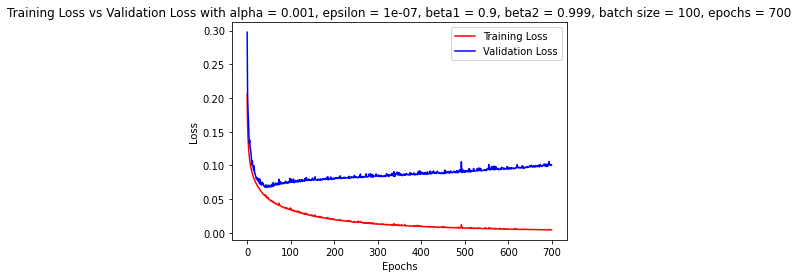

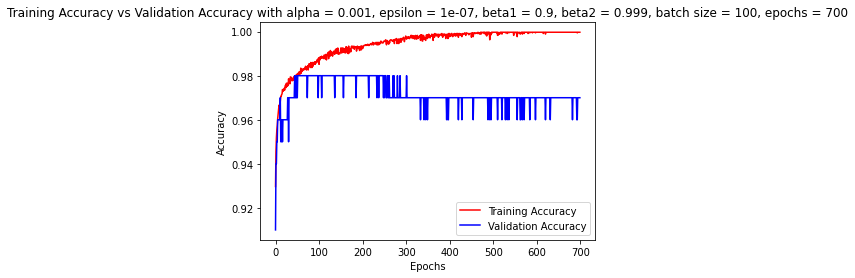

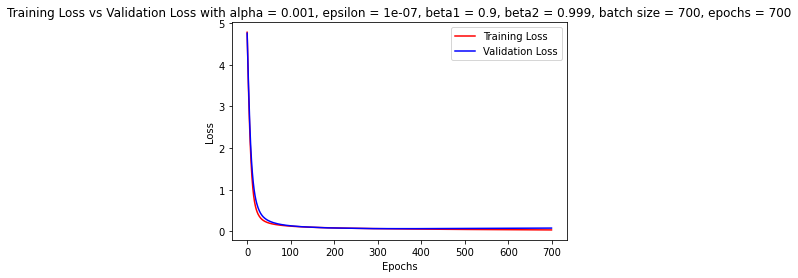

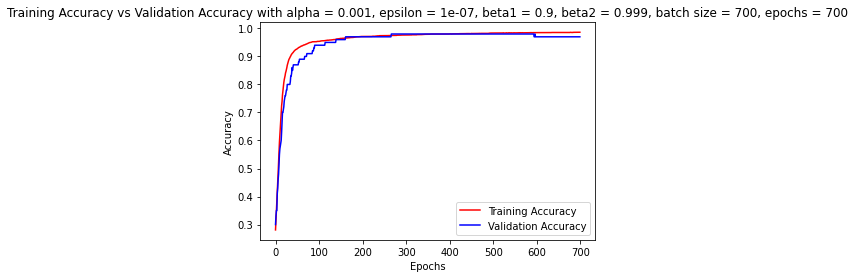

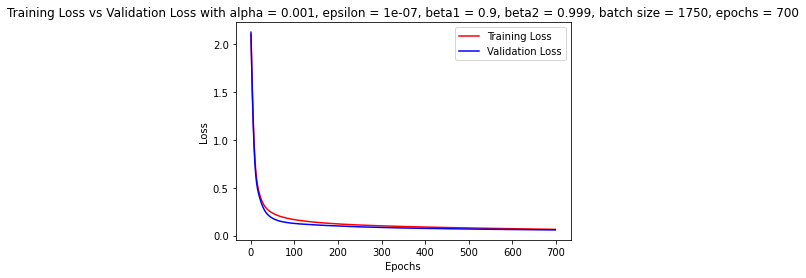

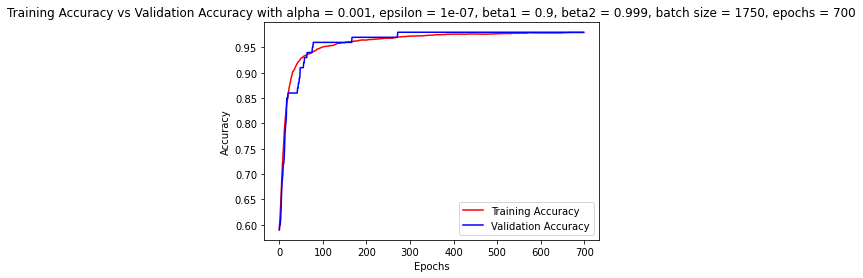

In [ ]:
for size in batch_sizes:
  train_loss, valid_loss, test_loss, train_acc, valid_acc, test_acc = SGD(size, 0.9, 0.999, 1e-7, 0.001, 700)
  plt.figure()
  plt.plot(range(epochs), train_loss, 'r-')
  plt.plot(range(epochs), valid_loss, 'b-')
  plt.legend(["Training Loss", "Validation Loss"])
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Training Loss vs Validation Loss with " + "alpha = " + str(alpha) + ", epsilon = " + str(epsilon) + ", beta1 = " + str(beta1) + ", beta2 = " + str(beta2) + ", batch size = " + str(size) + ", epochs = " + str(epochs) )

  plt.figure()
  plt.plot(range(epochs), train_acc, 'r-')
  plt.plot(range(epochs), valid_acc, 'b-')
  plt.legend(["Training Accuracy", "Validation Accuracy"])
  plt.xlabel('Epochs')
  plt.ylabel("Accuracy")
  plt.title("Training Accuracy vs Validation Accuracy with " + "alpha = " + str(alpha) + ", epsilon = " + str(epsilon) + ", beta1 = " + str(beta1) + ", beta2 = " + str(beta2) + ", batch size = " + str(size) + ", epochs = " + str(epochs) )

  # print(train_acc[-1])
  # print(valid_acc[-1])

4. Hyperparameter Investigation

In [ ]:
beta1s = [0.95, 0.99]
beta2s = [0.99, 0.9999]
epsilons = [1e-9, 1e-4]

0.9925714285714285
0.97
0.9724137931034482
0.9948571428571429
0.96
0.9793103448275862


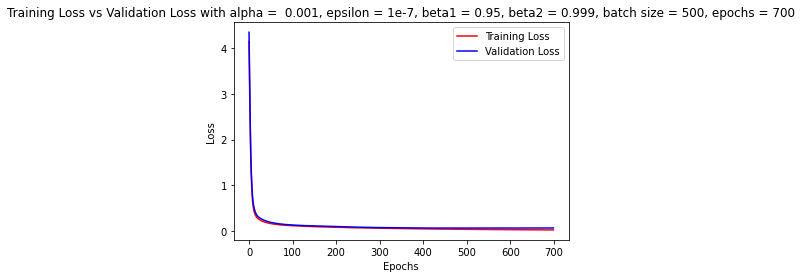

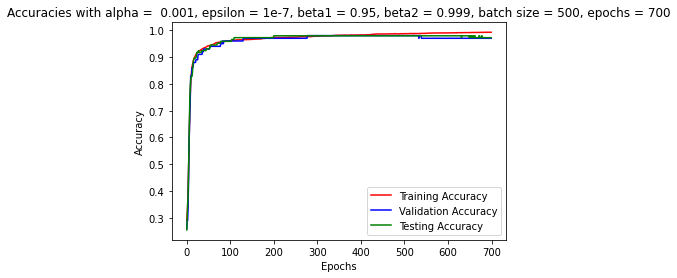

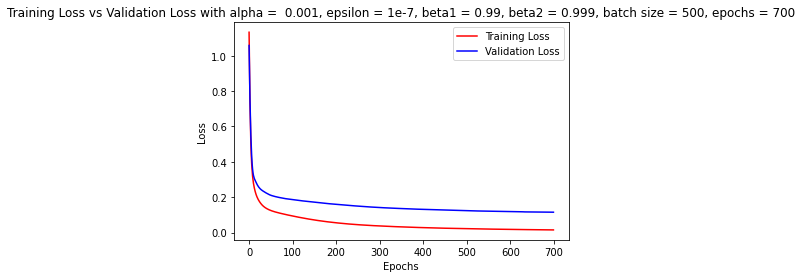

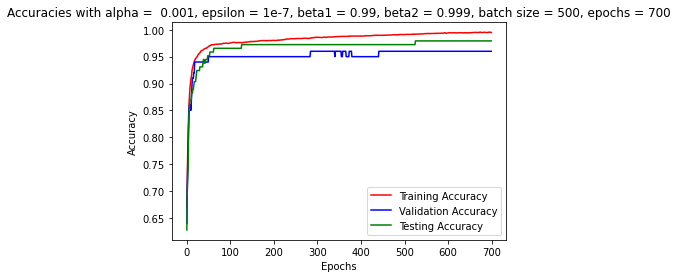

In [ ]:
for beta1 in beta1s:
  train_loss, valid_loss, test_loss, train_acc, valid_acc, test_acc = SGD(500, beta1, 0.999, 1e-7, 0.001, 700)
  plt.figure()
  plt.plot(range(epochs), train_loss, 'r-')
  plt.plot(range(epochs), valid_loss, 'b-')
  plt.legend(["Training Loss", "Validation Loss"])
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Training Loss vs Validation Loss with " + "alpha =  0.001, epsilon = 1e-7" + ", beta1 = " + str(beta1) + ", beta2 = 0.999, batch size = 500, epochs = 700" )

  plt.figure()
  plt.plot(range(epochs), train_acc, 'r-')
  plt.plot(range(epochs), valid_acc, 'b-')
  plt.plot(range(epochs), test_acc, 'g-' )
  plt.legend(["Training Accuracy", "Validation Accuracy", "Testing Accuracy"])
  plt.xlabel('Epochs')
  plt.ylabel("Accuracy")
  plt.title("Accuracies with " + "alpha =  0.001, epsilon = 1e-7" + ", beta1 = " + str(beta1) + ", beta2 = 0.999, batch size = 500, epochs = 700" )
  
  # print(train_acc[-1])
  # print(valid_acc[-1])
  # print(test_acc[-1])

0.9968571428571429
0.97
0.9793103448275862
0.9854285714285714
0.96
0.9793103448275862


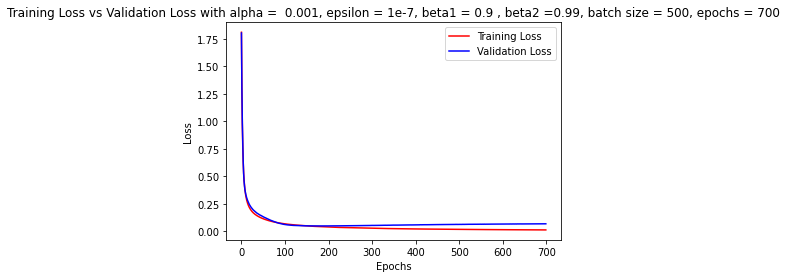

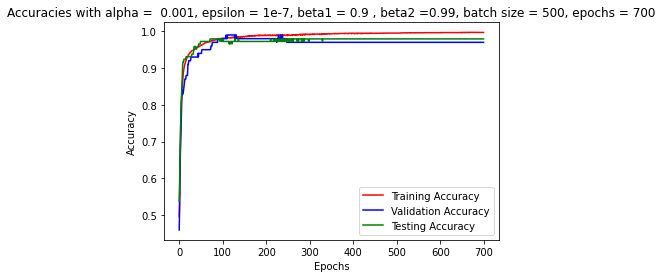

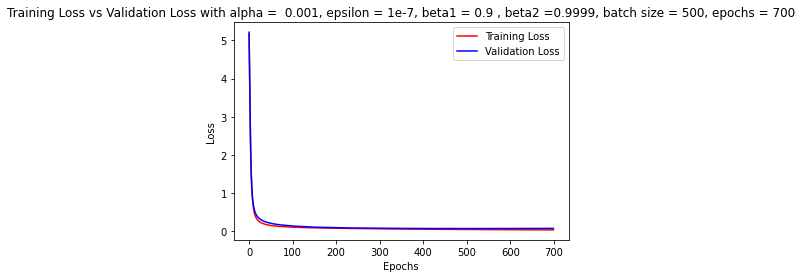

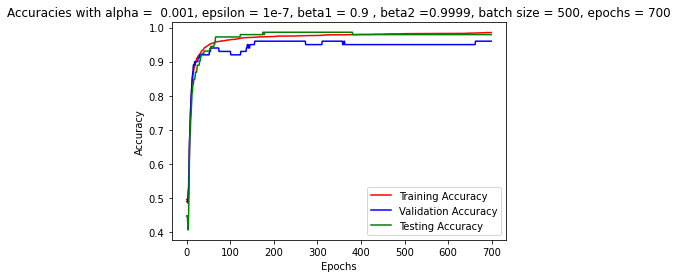

In [ ]:
for beta2 in beta2s:
  train_loss, valid_loss, test_loss, train_acc, valid_acc, test_acc = SGD(500, 0.9, beta2, 1e-7, 0.001, 700)
  plt.figure()
  plt.plot(range(epochs), train_loss, 'r-')
  plt.plot(range(epochs), valid_loss, 'b-')
  plt.legend(["Training Loss", "Validation Loss"])
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Training Loss vs Validation Loss with alpha =  0.001, epsilon = 1e-7, beta1 = 0.9 " + ", beta2 =" + str(beta2)+ ", batch size = 500, epochs = 700" )

  plt.figure()
  plt.plot(range(epochs), train_acc, 'r-')
  plt.plot(range(epochs), valid_acc, 'b-')
  plt.plot(range(epochs), test_acc, 'g-')
  plt.legend(["Training Accuracy", "Validation Accuracy", "Testing Accuracy"])
  plt.xlabel('Epochs')
  plt.ylabel("Accuracy")
  plt.title("Accuracies with alpha =  0.001, epsilon = 1e-7, beta1 = 0.9 " + ", beta2 =" + str(beta2)+ ", batch size = 500, epochs = 700" )
  # print(train_acc[-1])
  # print(valid_acc[-1])
  # print(test_acc[-1])

0.9934285714285714
0.97
0.9793103448275862
0.9948571428571429
0.97
0.9862068965517241


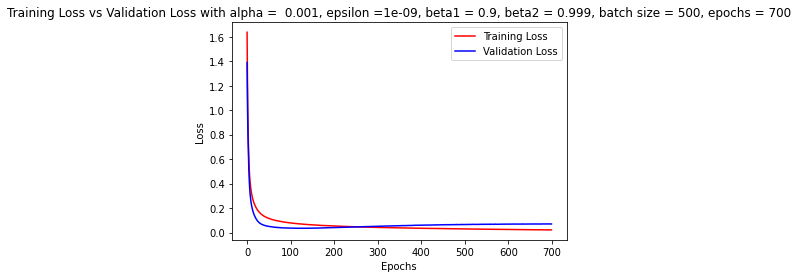

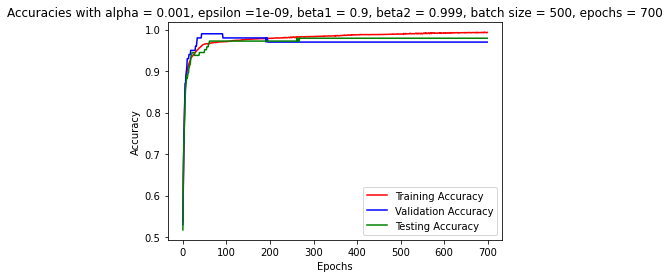

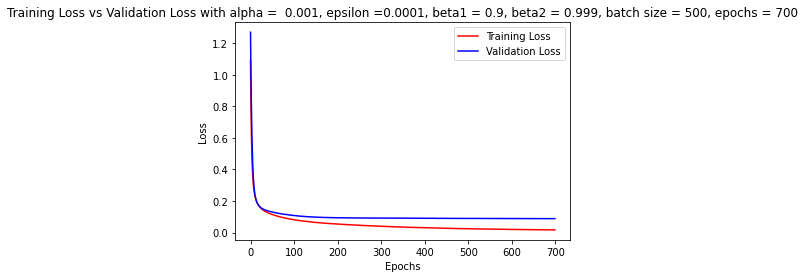

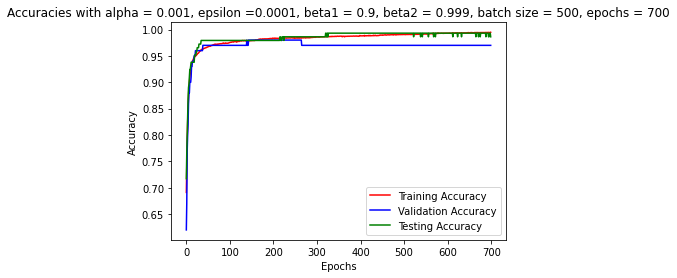

In [ ]:
for epsilon in epsilons:
  train_loss, valid_loss, test_loss, train_acc, valid_acc, test_acc = SGD(500, 0.9, 0.999, epsilon, 0.001, 700)
  plt.figure()
  plt.plot(range(epochs), train_loss, 'r-')
  plt.plot(range(epochs), valid_loss, 'b-')
  plt.legend(["Training Loss", "Validation Loss"])
  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.title("Training Loss vs Validation Loss with alpha =  0.001, epsilon =" + str(epsilon) + ", beta1 = 0.9, beta2 = 0.999, batch size = 500, epochs = 700" )

  plt.figure()
  plt.plot(range(epochs), train_acc, 'r-')
  plt.plot(range(epochs), valid_acc, 'b-')
  plt.plot(range(epochs), test_acc, 'g-')
  plt.legend(["Training Accuracy", "Validation Accuracy","Testing Accuracy"])
  plt.xlabel('Epochs')
  plt.ylabel("Accuracy")
  plt.title("Accuracies with alpha = 0.001, epsilon =" + str(epsilon) + ", beta1 = 0.9, beta2 = 0.999, batch size = 500, epochs = 700" )
  # print(train_acc[-1])
  # print(valid_acc[-1])
  # print(test_acc[-1])